Analysis of the impact of the use of mobile devices on academic performance.

In [ ]:
# ======================================  ENVIRONMENT INITIALIZATION  ======================================
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data cleaning before analysis
%run ./0_cleaning_data.ipynb

# Creating and visualizing a new variable for the data
dataFrame = pd.read_csv('../data/processed_data/processed_dataframe.csv')
dataFrame.head()

In [ ]:
print(dataFrame['Hour Uses'].value_counts(dropna = False), end = '\n\n')
print(dataFrame['Performance Impact'].value_counts(dropna = False))

In [109]:
print('Hours and impact performances:')
hours = []
performance = []
datas = []

for hour in dataFrame['Hour Uses'].dropna().unique():
    hours.append(hour)
    performance.append(dataFrame[dataFrame['Hour Uses'] == hour]['Performance Impact'].value_counts().to_dict())

for data in range(len(hours)):
    print(hours[data], performance[data])

Hours and impact performances:
4-6 hours {'Agree': 18, 'Neutral': 11, 'Disagree': 6, 'Strongly agree': 5}
2-4 hours {'Agree': 12, 'Neutral': 6, 'Strongly agree': 4, 'Strongly disagree': 3, 'Disagree': 1}
> 6 hours {'Neutral': 9, 'Agree': 8, 'Strongly disagree': 5, 'Strongly agree': 3}
< 2 hours {'Neutral': 3, 'Agree': 2, 'Strongly disagree': 2}


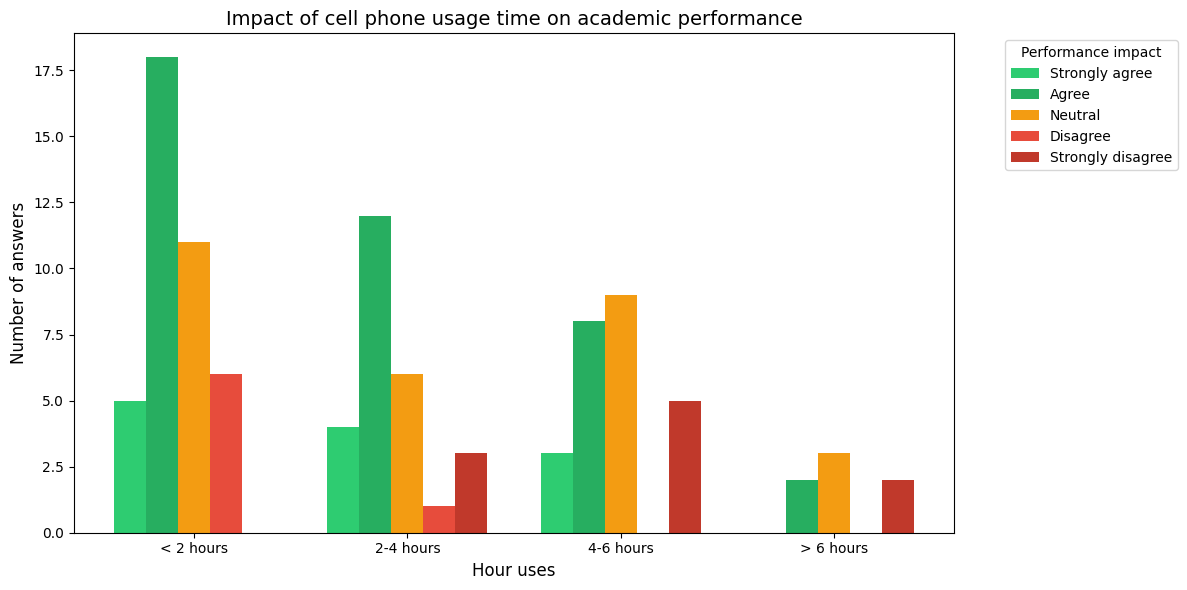

In [7]:
# Displaying all possible answers in descending order
all_responses = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
colors = ['#2ecc71', '#27ae60', '#f39c12', '#e74c3c', '#c0392b']

# Preparing data for graphs
response_data = {resp: [] for resp in all_responses}
for counts in performance:
    for resp in all_responses:
        response_data[resp].append(counts.get(resp, 0))

# Ordering the hours
hour_order = ['< 2 hours', '2-4 hours', '4-6 hours', '> 6 hours']
hour_groups = sorted(hours, key=lambda x: hour_order.index(x) if x in hour_order else len(hour_order))

# Creating graphic
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(hour_groups))

# Plotting each type of response
for i, resp in enumerate(all_responses):
    ax.bar(index + i*bar_width, response_data[resp], bar_width, 
           label=resp, color=colors[i])

# Customizing graphic
ax.set_xlabel('Hour uses', fontsize=12)
ax.set_ylabel('Number of answers', fontsize=12)
ax.set_title('Impact of cell phone usage time on academic performance', fontsize=14)
ax.set_xticks(index + bar_width*2)
ax.set_xticklabels(hour_groups)
ax.legend(title='Performance impact', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()